## Vacancy Rates in Seattle, WA and What They Could Mean for Companies
Based on the dataset from Apartmentlist.com, it seems that vacancy is on the

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [4]:
# Read in file and do basic clean-up
apartment_data = "Resources/Apartment_List_Vacancy_Index_2023_01.csv"
apartment_df = pd.read_csv(apartment_data)
seattle_df = apartment_df.loc[apartment_df["location_name"] == "Seattle, WA"]
seattle_df

,location_name,location_type,location_fips_code,population,state,county,metro,2017_01,2017_02,2017_03,...,2022_04,2022_05,2022_06,2022_07,2022_08,2022_09,2022_10,2022_11,2022_12,2023_01
202,"Seattle, WA",City,5363000,741251,Washington,King County,"Seattle-Tacoma-Bellevue, WA",0.04295,0.043194,0.043135,...,0.060366,0.058095,0.054743,0.051956,0.05111,0.054013,0.058966,0.064128,0.068006,0.070712


In [6]:
# Set x axis equal to values from seattle
x_axis = seattle_df.iloc[0, 7:80].values
labels = ["2017", "2018", "2019", "2020", "2021", "2022", "2023"]
starts = []

# Sort out how to display months rather than numbers

for i in range(7):
    starts.append(i * 12)

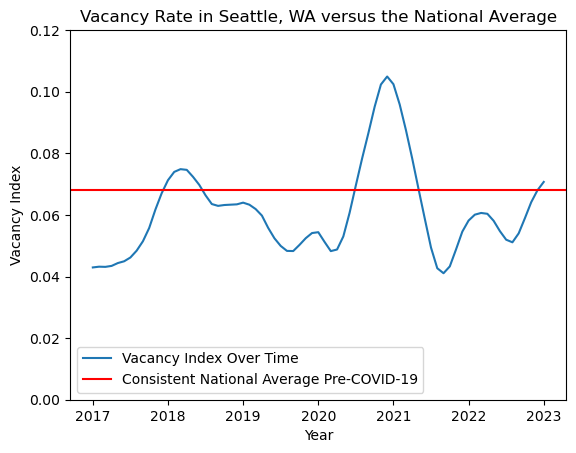

In [7]:
fig, ax = plt.subplots()

# Plot values
ax.plot(x_axis, label='Vacancy Index Over Time')
ax.axhline(y = 0.068, color = 'r', label='Consistent National Average Pre-COVID-19')

ax.set_xticks(starts)
ax.set_xticklabels(labels)

# Make things neater
plt.legend()
plt.title("Vacancy Rate in Seattle, WA versus the National Average")
plt.xlabel("Year")
plt.ylabel("Vacancy Index")
plt.ylim(0, 0.12)
plt.show()

# Vacancy Index Calculation
taken from https://www.apartmentlist.com/research/apartment-list-vacancy-index in the Methodology section
 
    "To calculate our vacancy index, we leverage the extensive dataset that powers our platform. Apartment List maintains robust data integrations with the properties that list with us, allowing us to track pricing and availability changes as soon as they occur. This not only creates a great experience for our users, but also gives us unique insight into trends in the rental market. For every property on our platform, we know the total number of units in the building, as well as the number that are vacant on any given day, allowing us to calculate a daily vacancy rate for each property in our sample. Our monthly vacancy index for a given location is calculated by taking an average of the daily vacancy rates for each property and then averaging the rates of all the properties that fall within the bounds of the given location (city, county, metro, state, or national), weighted by the number of units in each property..."